In [ ]:
import csv
import numpy as np
import pandas as pd

np.random.seed(0)

# Nombre d'échantillons
n_samples = 1000

# Proportion des classes
prop_critical = 0.50
prop_normal = 0.50

# Nombre d'échantillons pour chaque classe
n_critical = int(n_samples * prop_critical)
n_normal = int(n_samples * prop_normal)
n_unlabeled = n_samples - n_critical - n_normal

# Génération aléatoire des données de SP02 en fonction des classes
sp02_critical = np.random.randint(80, 90, size=n_critical)
sp02_normal = np.random.randint(90, 101, size=n_normal)
sp02_unlabeled = np.random.randint(85, 101, size=n_unlabeled)

# Génération aléatoire des autres paramètres de santé en fonction des classes
bp_systolic_critical = np.random.randint(0, 60, size=n_critical)
bp_systolic_critical = np.random.randint(90, 160, size=n_critical)
bp_systolic_normal = np.random.randint(60, 91, size=n_normal)
bp_systolic_unlabeled = np.random.randint(90, 160, size=n_unlabeled)

bp_diastolic_critical = np.random.randint(0, 30, size=n_critical)
bp_diastolic_critical = np.random.randint(60, 100, size=n_critical)
bp_diastolic_normal = np.random.randint(30, 61, size=n_normal)
bp_diastolic_unlabeled = np.random.randint(70, 91, size=n_unlabeled)

hr_critical = np.random.randint(0, 55, size=n_critical)
hr_critical = np.random.randint(160, 200, size=n_critical)
hr_normal = np.random.randint(100, 161, size=n_normal)
hr_unlabeled = np.random.randint(60, 150, size=n_unlabeled)

pulse_critical = np.random.randint(0, 6, size=n_critical)
pulse_critical = np.random.randint(21, 31, size=n_critical)
pulse_normal = np.random.randint(12, 20, size=n_normal)
pulse_unlabeled = np.random.randint(12, 31, size=n_unlabeled)

temperature_critical = np.random.uniform(39.0, 40.6, size=n_critical)
temperature_critical = np.round(temperature_critical, decimals=1)

temperature_normal = np.random.uniform(36.0, 37.6, size=n_normal)
temperature_normal = np.round(temperature_normal, decimals=1)

temperature_unlabeled = np.random.uniform(36.0, 37.6, size=n_unlabeled)
temperature_unlabeled = np.round(temperature_unlabeled, decimals=1)

# Combinaison des sous-tableaux pour former les tableaux complets
sp02 = np.concatenate((sp02_critical, sp02_normal, sp02_unlabeled))
bp_systolic = np.concatenate((bp_systolic_critical, bp_systolic_normal, bp_systolic_unlabeled))
bp_diastolic = np.concatenate((bp_diastolic_critical, bp_diastolic_normal, bp_diastolic_unlabeled))
hr = np.concatenate((hr_critical, hr_normal, hr_unlabeled))
pulse = np.concatenate((pulse_critical, pulse_normal, pulse_unlabeled))
temperature = np.concatenate((temperature_critical, temperature_normal, temperature_unlabeled))

# Attribution des classes
labels_critical = np.full(n_critical, "Critical")
labels_normal = np.full(n_normal, "Normal")
labels_unlabeled = np.random.choice(["Critical", "Normal"], size=n_unlabeled)
labels = np.concatenate((labels_critical, labels_normal, labels_unlabeled))

# Création d'un DataFrame pandas pour l'analyse
df = pd.DataFrame({'SP02': sp02, 'BP Systolic': bp_systolic, 'BP Diastolic': bp_diastolic, 'HR': hr, 'Pulse': pulse, 'Temperature': temperature, 'Class': labels})

# Mélange des lignes des données
df = df.sample(frac=1).reset_index(drop=True)

# Chemin du fichier CSV de sortie
output_file = 'donnees_sante.csv'

# Écriture des données générées dans un fichier CSV
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(df.columns)  # Écriture de l'en-tête des colonnes
    for _, row in df.iterrows():
        writer.writerow(row.values)  # Écriture des données d'un record

# Affichage des données générées
print(df.to_string(index=False))

# Nombre de records pour chaque classe
count_critical = df[df['Class'] == 'Critical'].shape[0]
count_normal = df[df['Class'] == 'Normal'].shape[0]
print("Nombre de records Critical:", count_critical)
print("Nombre de records Normal:", count_normal)


 SP02  BP Systolic  BP Diastolic  HR  Pulse  Temperature    Class
   83          150            64 161     24         39.7 Critical
   90           78            36 151     14         37.4   Normal
   93           63            45 123     19         36.2   Normal
   99           89            45 118     17         37.0   Normal
   91           90            53 128     18         36.7   Normal
   80          158            65 196     27         39.9 Critical
   87          153            81 175     26         40.3 Critical
   95           64            51 113     16         37.5   Normal
   88          108            78 177     25         39.9 Critical
   92           64            53 147     18         37.2   Normal
   91           87            33 117     15         36.5   Normal
   91           71            43 142     14         37.2   Normal
   91           67            32 124     16         37.5   Normal
   93           71            58 139     12         36.1   Normal
   96     

In [ ]:
import csv
import numpy as np
import pandas as pd

np.random.seed(0)

# Chargement du dataset existant
df = pd.read_csv('donnees_sante.csv')

# Calcul du nombre de records à supprimer
n_samples = len(df)
n_labels_to_remove = int(0.6 * n_samples)
n_labels_to_remove_normal = int(0.3 * n_labels_to_remove)
n_labels_to_remove_critical = n_labels_to_remove - n_labels_to_remove_normal

# Sélection aléatoire des indices des labels à supprimer de classe "Normal"
indices_normal = df[df['Class'] == 0].index
indices_to_remove_normal = np.random.choice(indices_normal, size=n_labels_to_remove_normal, replace=False)

# Sélection aléatoire des indices des labels à supprimer de classe "Critical"
indices_critical = df[df['Class'] == 1].index
indices_to_remove_critical = np.random.choice(indices_critical, size=n_labels_to_remove_critical, replace=False)

# Fusion des indices à supprimer
indices_to_remove = np.concatenate((indices_to_remove_normal, indices_to_remove_critical))

# Suppression des labels correspondants
df.loc[indices_to_remove, 'Class'] = ' '

# Chemin du fichier CSV de sortie
output_file = 'nouveau_dataset.csv'

# Écriture du nouveau dataset dans un fichier CSV
df.to_csv(output_file, index=False)

# Affichage des données générées
print(df.to_string(index=False))

# Calcul du nombre de records avec labels
n_records_with_labels = df[df['Class'] != ''].shape[0]

# Calcul du nombre de records sans labels
n_records_without_labels = df[df['Class'] == ''].shape[0]

# Affichage du nombre de records avec labels et sans labels
print("Nombre de records avec labels : ", n_records_with_labels)
print("Nombre de records sans labels : ", n_records_without_labels)



ValueError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Record 1 - Predicted Label: Critical
Record 2 - Predicted Label: Critical
Record 3 - Predicted Label: Critical
Record 4 - Predicted Label: Critical
Record 5 - Predicted Label: Critical
Record 6 - Predicted Label: Critical
Record 7 - Predicted Label: Normal
Record 8 - Predicted Label: Normal
Record 9 - Predicted Label: Normal
Record 10 - Predicted Label: Normal
Record 11 - Predicted Label: Normal
Record 12 - Predicted Label: Normal
Record 13 - Predicted Label: Normal
Record 14 - Predicted Label: Critical
Record 15 - Predicted Label: Critical
Record 16 - Predicted Label: Critical
Record 17 - Predicted Label: Critical
Record 18 - Predicted Label: Critical
Record 19 - Predicted Label: Normal
Record 20 - Predicted Label: Critical
Record 21 - Predicted Label: Critical
Record 22 - Predicted Label: Critical
Record 23 - Predicted Label: Normal
Record 24 - Predicted Label: Critical
Record 25 - Predicted Label: Normal
Record 26 - Predicted Label: Critical
Record 27 - Predicted Label: Normal
Recor

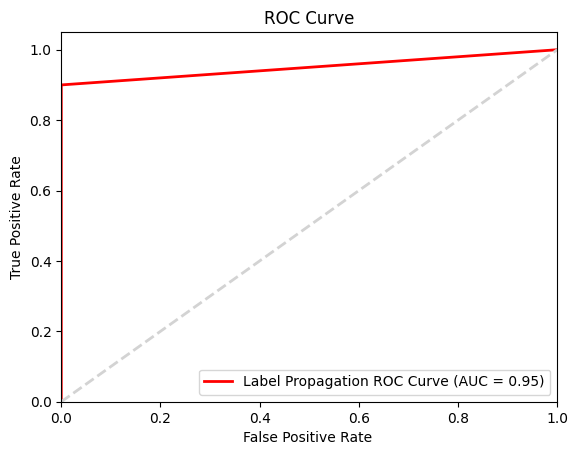

In [ ]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Chargement du dataset
dataset = pd.read_csv('nouveau_dataset.csv')

# Séparation des données et des classes
X_labeled = dataset[~dataset['Class'].isnull()].drop('Class', axis=1)
X_unlabeled = dataset[dataset['Class'].isnull()].drop('Class', axis=1)
y_labeled = dataset[~dataset['Class'].isnull()]['Class']

# Conversion des classes en valeurs numériques
label_map = {'Critical': 0, 'Normal': 1}
y_numeric = np.array([label_map[label] for label in y_labeled])

# Création du modèle de propagation de labels
model = LabelPropagation()

# Entraînement du modèle sur les données étiquetées
model.fit(X_labeled, y_numeric)

# Prédiction des classes pour les données non étiquetées
y_pred = model.predict(X_unlabeled)

# Remplacement des valeurs numériques par les étiquettes originales
y_pred_labels = np.array(['Critical' if label == 0 else 'Normal' for label in y_pred])

# Mise à jour du dataset avec les classes prédites
dataset.loc[dataset['Class'].isnull(), 'Class'] = y_pred_labels

# Affichage des prédictions de labels pour les données non étiquetées
for i, label in enumerate(y_pred_labels):
    print(f"Record {i+1} - Predicted Label: {label}")

# Chargement du dataset initial avec les classes réelles
dataset_initial = pd.read_csv('donnees_sante.csv')

# Extraction des classes réelles du dataset initial
y_true = dataset_initial['Class'].values

# Extraction des classes prédites du nouveau dataset
y_pred = dataset['Class'].values

# Affichage du rapport de classification
print(classification_report(y_true, y_pred))

# Sauvegarde du dataset mis à jour

dataset.to_csv('Predictions-semi-supervise.csv', index=False)
# Extraction des classes réelles du dataset initial
y_true = dataset_initial['Class'].values

# Extraction des classes prédites du nouveau dataset
y_pred = dataset['Class'].values

# Conversion des étiquettes en valeurs binaires
y_true_binary = label_binarize(y_true, classes=['Critical', 'Normal'])
y_pred_binary = label_binarize(y_pred, classes=['Critical', 'Normal'])

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(y_true_binary.ravel(), y_pred_binary.ravel())
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Label Propagation ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='lightgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import csv
import numpy as np
import pandas as pd

np.random.seed(0)

# Nombre d'échantillons
n_samples = 5000

# Proportion des classes
prop_critical = 0.5
prop_normal = 0.5

# Nombre d'échantillons pour chaque classe
n_critical = int(n_samples * prop_critical)
n_normal = int(n_samples * prop_normal)

# Génération aléatoire des données de SP02 en fonction des classes
sp02_critical = np.random.randint(85, 101, size=n_critical)
sp02_normal = np.random.randint(85, 90, size=n_normal)

# Génération aléatoire des autres paramètres de santé en fonction des classes
bp_systolic_critical = np.random.randint(0, 141, size=n_critical)
bp_systolic_normal = np.random.randint(110, 121, size=n_normal)

bp_diastolic_critical = np.random.randint(0, 100, size=n_critical)
bp_diastolic_normal = np.random.randint(70, 91, size=n_normal)

hr_critical = np.random.randint(160, 201, size=n_critical)
hr_normal = np.random.randint(60, 121, size=n_normal)

pulse_critical = np.random.randint(21, 31, size=n_critical)
pulse_normal = np.random.randint(12, 20, size=n_normal)

temperature_critical = np.random.uniform(39.0, 40.6, size=n_critical)
temperature_critical = np.round(temperature_critical, decimals=1)

temperature_normal = np.random.uniform(36.0, 37.6, size=n_normal)
temperature_normal = np.round(temperature_normal, decimals=1)

# Combinaison des sous-tableaux pour former les tableaux complets
sp02 = np.concatenate((sp02_critical, sp02_normal))
bp_systolic = np.concatenate((bp_systolic_critical, bp_systolic_normal))
bp_diastolic = np.concatenate((bp_diastolic_critical, bp_diastolic_normal))
hr = np.concatenate((hr_critical, hr_normal))
pulse = np.concatenate((pulse_critical, pulse_normal))
temperature = np.concatenate((temperature_critical, temperature_normal))

# Attribution des classes
labels = np.concatenate((np.full(n_critical, "Critical"), np.full(n_normal, "Normal")))

# Création d'un DataFrame pandas pour l'analyse
df = pd.DataFrame({'SP02': sp02, 'BP Systolic': bp_systolic, 'BP Diastolic': bp_diastolic,
                   'HR': hr, 'Pulse': pulse, 'Temperature': temperature, 'Class': labels})

# Mélange des lignes des données
df = df.sample(frac=1).reset_index(drop=True)

# Chemin du fichier CSV de sortie
output_file = 'donnees_sante.csv'

# Écriture des données générées dans un fichier CSV
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(df.columns)  # Écriture de l'en-tête des colonnes
    for _, row in df.iterrows():
        writer.writerow(row.values)  # Écriture des données d'un record

# Affichage des données générées
print(df.to_string(index=False))

# Nombre de records pour chaque classe
count_critical = df[df['Class'] == 'Critical'].shape[0]
count_normal = df[df['Class'] == 'Normal'].shape[0]
print("Nombre de records Critical:", count_critical)
print("Nombre de records Normal:", count_normal)


 SP02  BP Systolic  BP Diastolic  HR  Pulse  Temperature    Class
   88          117            76  98     13         36.3   Normal
   94          139            40 187     26         40.5 Critical
   86          118            81  68     18         36.6   Normal
   86           55            67 193     24         40.2 Critical
   88          113            79 116     17         36.5   Normal
   85          119            79 105     17         36.8   Normal
   87          115            81  60     14         37.6   Normal
   88          116            74  92     12         37.3   Normal
   98           94            66 187     21         39.8 Critical
   90           34            96 167     30         40.0 Critical
   92           42            80 172     24         39.1 Critical
  100          128            87 180     24         39.6 Critical
   88           54            43 161     26         40.0 Critical
   86           96            41 163     23         39.7 Critical
   85     

In [ ]:
import csv
import numpy as np
import pandas as pd

np.random.seed(0)

# Chargement du dataset existant
df = pd.read_csv('donnees_sante.csv')

# Calcul du nombre de records à supprimer
n_samples = len(df)
n_labels_to_remove = int(0.7 * n_samples)
n_labels_to_remove_normal = int(0.35 * n_labels_to_remove)
n_labels_to_remove_critical = n_labels_to_remove - n_labels_to_remove_normal

# Sélection aléatoire des indices des labels à supprimer de classe "Normal"
indices_normal = df[df['Class'] == 'Normal'].index
indices_to_remove_normal = np.random.choice(indices_normal, size=n_labels_to_remove_normal, replace=False)

# Sélection aléatoire des indices des labels à supprimer de classe "Critical"
indices_critical = df[df['Class'] == 'Critical'].index
indices_to_remove_critical = np.random.choice(indices_critical, size=n_labels_to_remove_critical, replace=False)

# Fusion des indices à supprimer
indices_to_remove = np.concatenate((indices_to_remove_normal, indices_to_remove_critical))

# Suppression des labels correspondants
df.loc[indices_to_remove, 'Class'] = ''

# Chemin du fichier CSV de sortie
output_file = 'nouveau_dataset.csv'

# Écriture du nouveau dataset dans un fichier CSV
df.to_csv(output_file, index=False)

# Affichage des données générées
print(df.to_string(index=False))

# Calcul du nombre de records avec labels
n_records_with_labels = df[df['Class'] != ''].shape[0]

# Calcul du nombre de records sans labels
n_records_without_labels = df[df['Class'] == ''].shape[0]

# Affichage du nombre de records avec labels et sans labels
print("Nombre de records avec labels : ", n_records_with_labels)
print("Nombre de records sans labels : ", n_records_without_labels)



 SP02  BP Systolic  BP Diastolic  HR  Pulse  Temperature    Class
   88          117            76  98     13         36.3   Normal
   94          139            40 187     26         40.5 Critical
   86          118            81  68     18         36.6         
   86           55            67 193     24         40.2         
   88          113            79 116     17         36.5         
   85          119            79 105     17         36.8   Normal
   87          115            81  60     14         37.6         
   88          116            74  92     12         37.3         
   98           94            66 187     21         39.8         
   90           34            96 167     30         40.0         
   92           42            80 172     24         39.1         
  100          128            87 180     24         39.6         
   88           54            43 161     26         40.0         
   86           96            41 163     23         39.7         
   85     

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Record 1 - Predicted Label: Normal
Record 2 - Predicted Label: Critical
Record 3 - Predicted Label: Normal
Record 4 - Predicted Label: Normal
Record 5 - Predicted Label: Normal
Record 6 - Predicted Label: Critical
Record 7 - Predicted Label: Critical
Record 8 - Predicted Label: Critical
Record 9 - Predicted Label: Critical
Record 10 - Predicted Label: Critical
Record 11 - Predicted Label: Critical
Record 12 - Predicted Label: Critical
Record 13 - Predicted Label: Normal
Record 14 - Predicted Label: Critical
Record 15 - Predicted Label: Normal
Record 16 - Predicted Label: Critical
Record 17 - Predicted Label: Critical
Record 18 - Predicted Label: Critical
Record 19 - Predicted Label: Critical
Record 20 - Predicted Label: Normal
Record 21 - Predicted Label: Normal
Record 22 - Predicted Label: Critical
Record 23 - Predicted Label: Critical
Record 24 - Predicted Label: Critical
Record 25 - Predicted Label: Normal
Record 26 - Predicted Label: Normal
Record 27 - Predicted Label: Normal
Recor

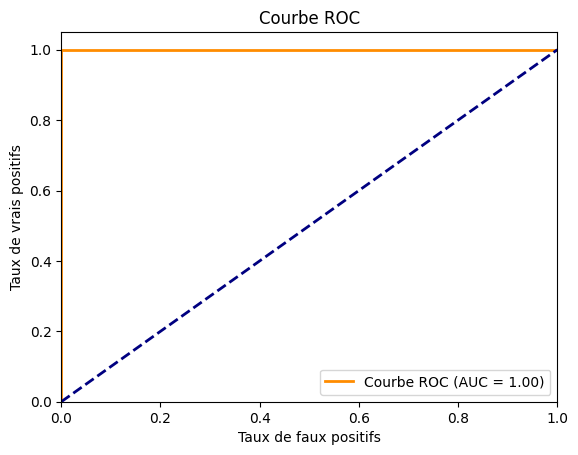

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00      2500
      Normal       1.00      1.00      1.00      2500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Chargement du dataset
dataset = pd.read_csv('nouveau_dataset.csv')

# Séparation des données et des classes
X_labeled = dataset[~dataset['Class'].isnull()].drop('Class', axis=1)
X_unlabeled = dataset[dataset['Class'].isnull()].drop('Class', axis=1)
y_labeled = dataset[~dataset['Class'].isnull()]['Class']

# Conversion des classes en valeurs numériques
label_map = {'Critical': 0, 'Normal': 1}
y_numeric = np.array([label_map[label] for label in y_labeled])

# Création du modèle de propagation de labels
model = LabelPropagation()

# Entraînement du modèle sur les données étiquetées
model.fit(X_labeled, y_numeric)

# Prédiction des classes pour les données non étiquetées
y_pred = model.predict(X_unlabeled)

# Remplacement des valeurs numériques par les étiquettes originales
y_pred_labels = np.array(['Critical' if label == 0 else 'Normal' for label in y_pred])

# Mise à jour du dataset avec les classes prédites
dataset.loc[dataset['Class'].isnull(), 'Class'] = y_pred_labels

# Affichage des prédictions de labels pour les données non étiquetées
for i, label in enumerate(y_pred_labels):
    print(f"Record {i+1} - Predicted Label: {label}")

# Chargement du dataset initial avec les classes réelles
dataset_initial = pd.read_csv('donnees_sante.csv')

# Extraction des classes réelles du dataset initial
y_true = dataset_initial['Class'].values

# Extraction des classes prédites du nouveau dataset
y_pred = dataset['Class'].values

# Conversion des étiquettes en valeurs binaires
y_true_binary = label_binarize(y_true, classes=['Critical', 'Normal'])
y_pred_binary = label_binarize(y_pred, classes=['Critical', 'Normal'])

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(y_true_binary.ravel(), y_pred_binary.ravel())
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Calcul des métriques de classification
classification_metrics = classification_report(y_true, y_pred)
print(classification_metrics)

# Sauvegarde du dataset mis à jour
dataset.to_csv('Predictions-semi-supervise.csv', index=False)


In [ ]:
import pandas as pd

# Chargement des fichiers
dataset_original = pd.read_csv('donnees_sante.csv')
dataset_semi_supervise = pd.read_csv('nouveau_dataset.csv')
predictions_semi_supervise = pd.read_csv('Predictions-semi-supervise.csv')

# Division du fichier 'donnees_sante.csv' en train_initial et test_initial
train_initial = dataset_original.sample(frac=0.8, random_state=42)
test_initial = dataset_original.drop(train_initial.index)

train_semi_supervise = dataset_semi_supervise.sample(frac=0.8, random_state=42)
test_semi_supervise = dataset_semi_supervise.drop(train_initial.index)

train_predictions = predictions_semi_supervise.sample(frac=0.8, random_state=42)
test_predictions = predictions_semi_supervise.drop(train_predictions.index)

# Sauvegarde des fichiers train_initial.csv et test_initial.csv
train_initial.to_csv('train_initial.csv', index=False)
test_initial.to_csv('test_initial.csv', index=False)

train_semi_supervise.to_csv('train_semi_supervise.csv',index=False)
test_semi_supervise.to_csv('test_semi_supervise.csv',index=False)

# Sauvegarde du fichier train_predictions.csv
train_predictions.to_csv('train_predictions.csv', index=False)

# Suppression de la colonne 'classe' du fichier test_predictions
test_predictions_without_class = test_predictions.iloc[:, :-1]

# Sauvegarde du fichier test_predictions.csv sans la colonne 'classe'
test_predictions_without_class.to_csv('test_predictions.csv', index=False)

# Affichage du nombre de lignes de chaque fichier
print("Nombre de lignes dans train_initial.csv :", len(train_initial))
print("Nombre de lignes dans test_initial.csv :", len(test_initial))
print("Nombre de lignes dans train_predictions.csv :", len(train_predictions))
print("Nombre de lignes dans test_predictions.csv :", len(test_predictions_without_class))


Nombre de lignes dans train_initial.csv : 800
Nombre de lignes dans test_initial.csv : 200
Nombre de lignes dans train_predictions.csv : 800
Nombre de lignes dans test_predictions.csv : 200


In [ ]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Chargement des données d'entraînement
train_data = pd.read_csv("train_predictions.csv")

# Séparation des features (X) et de la variable cible (y)
X_train = train_data.iloc[:, :-1]  # Toutes les colonnes sauf la dernière
y_train = train_data.iloc[:, -1]  # Dernière colonne

# Entraînement du modèle SARSA
sarsa_model = SGDClassifier(loss='log')
sarsa_model.fit(X_train, y_train)

# Chargement des données de test
test_data = pd.read_csv("test_semi_supervise.csv")
X_test = test_data.iloc[:, :-1]  # Toutes les colonnes sauf la dernière

# Prédiction des classes pour les données de test
predicted_classes = sarsa_model.predict(X_test)

# Création d'un nouveau dataframe avec les prédictions
sarsa_predictions = pd.DataFrame({
    "Classe Prédite": predicted_classes
})

SARSA_vs_Label_propagation = pd.DataFrame({
    "Prédictions SARSA        |": predicted_classes
})

# Chargement des données réelles pour comparaison
actual_data = pd.read_csv("test_initial.csv")

# Extraction des classes réelles
y_actual = actual_data.iloc[:, -1]

#chargement des données prédites du semi-supervisé pour comparaison
Label_propagation_data=pd.read_csv("test_predictions.csv")

#Extraction des données prédites de Label Propagation
y_semi = Label_propagation_data.iloc[:, -1]

# Ajout de la colonne des classes réelles dans le dataframe des prédictions
sarsa_predictions["Classe Réelle"] = y_actual

# Ajout de la colonne des classes prédites par Label Propagation
SARSA_vs_Label_propagation["Prédictions Label Propagation"] = y_semi

# Affichage des classes prédites et réelles côte à côte
print(sarsa_predictions)

# Encodage des classes réelles en valeurs numériques catégorielles
label_encoder = LabelEncoder()
y_actual_encoded = label_encoder.fit_transform(y_actual)
y_predicted_encoded = label_encoder.transform(predicted_classes)

# Calcul de la précision
accuracy = accuracy_score(y_actual_encoded, y_predicted_encoded)
print("Précision : ", accuracy)

# Calcul du rappel
recall = recall_score(y_actual_encoded, y_predicted_encoded, average='macro')
print("Rappel : ", recall)

# Calcul du score F1
f1 = f1_score(y_actual_encoded, y_predicted_encoded, average='macro')
print("Score F1 : ", f1)

# Calcul du taux d'erreur
error_rate = 1 - accuracy
print("Taux d'erreur : ", error_rate)

# Calcul de la courbe ROC (stratégie "ovo")
roc_auc = roc_auc_score(y_actual_encoded, sarsa_model.decision_function(X_test), multi_class='ovo')
print("Courbe ROC : ", roc_auc)

print(SARSA_vs_Label_propagation)


    Classe Prédite Classe Réelle
0         Critical      Critical
1         Critical      Critical
2           Normal        Normal
3           Normal        Normal
4         Critical      Critical
..             ...           ...
195         Normal        Normal
196       Critical      Critical
197       Critical      Critical
198         Normal        Normal
199         Normal        Normal

[200 rows x 2 columns]
Précision :  1.0
Rappel :  1.0
Score F1 :  1.0
Taux d'erreur :  0.0
Courbe ROC :  1.0
    Prédictions SARSA        |  Prédictions Label Propagation
0                     Critical                           40.0
1                     Critical                           40.0
2                       Normal                           36.9
3                       Normal                           37.5
4                     Critical                           39.3
..                         ...                            ...
195                     Normal                           37.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
import csv
import numpy as np

# Fonction d'activation pour la politique epsilon-greedy
def epsilon_greedy(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(range(Q.shape[1]))
    else:
        action = np.argmax(Q[state, :])
    return action

# Algorithme SARSA
def sarsa(dataset, alpha, gamma, epsilon, num_episodes):
    # Diviser les données en ensembles d'apprentissage et de test
    train_size = int(0.8 * len(dataset))
    train_data = dataset[:train_size]
    test_data = dataset[train_size:]

    # Extraction des caractéristiques et des étiquettes des données d'apprentissage
    train_features = np.array([data[:-1] for data in train_data])
    train_labels = np.array([data[-1] for data in train_data])

    # Extraction des caractéristiques et des étiquettes des données de test
    test_features = np.array([data[:-1] for data in test_data])
    test_labels = np.array([data[-1] for data in test_data])

    # Initialisation de la table Q avec des valeurs aléatoires
    num_actions = len(np.unique(train_labels))
    num_states = len(np.unique(train_features, axis=0))
    Q = np.random.rand(num_states, num_actions)

    # Boucle d'apprentissage
    for episode in range(num_episodes):
        state = np.random.choice(range(num_states))
        action = epsilon_greedy(Q, state, epsilon)

        while True:
            next_state = np.random.choice(range(num_states))
            next_action = epsilon_greedy(Q, next_state, epsilon)

            # Calcul de la récompense
            reward = 0 if train_labels[state] == train_labels[next_state] else -1

            # Mise à jour de la table Q
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            if next_state == num_states - 1:
                break

            state = next_state
            action = next_action

    # Extraction des états uniques des données de test
    unique_states = np.unique(test_features, axis=0)

    # Création du mapping d'états
    state_mapping = {tuple(state): index for index, state in enumerate(unique_states)}

    # Prédictions sur les données de test
   # Prédictions sur les données de test
    predictions = []
    for i in range(len(test_features)):
        state = state_mapping[tuple(test_features[i])]
        action = np.argmax(Q[state, :])
        # Mapping des actions prédites en classes (0 pour Normal, 1 pour Critical)
        prediction = 0 if action == 0 else 1
        predictions.append(prediction)


    # Évaluation sur les données de test
    # Évaluation sur les données de test
    correct_predictions = sum(predictions == test_labels)
    accuracy = correct_predictions / len(test_labels)

    return accuracy, predictions

# Lecture du fichier CSV pour les données d'entraînement
train_dataset = []
with open('Predictions-semi-supervise.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Ignorer la première ligne (noms des colonnes)
    for row in reader:
        train_dataset.append([float(value) for value in row[:-1]])

# Lecture du fichier CSV pour les données de test
test_dataset = []
with open('test_semi_supervise.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Ignorer la première ligne (noms des colonnes)
    for row in reader:
        test_dataset.append([float(value) for value in row[:-1]])

# Lecture du fichier CSV pour les classes réelles des données de test
test_labels = []
with open('test_initial.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Ignorer la première ligne (noms des colonnes)
    for row in reader:
        test_labels.append(row[-1])

# Conversion des étiquettes en valeurs numériques
label_mapping = {'Normal': 0, 'Critical': 1, }  # Ajouter l'étiquette manquante au dictionnaire
train_labels = np.array([label_mapping.get(data[-1], -1) for data in train_dataset])
test_labels = np.array([label_mapping.get(label, -1) for label in test_labels])


# Paramètres de l'algorithme SARSA
alpha = 0.9  # Taux d'apprentissage
gamma = 0.9  # Facteur d'escompte
epsilon = 0  # Paramètre epsilon pour la politique epsilon-greedy
num_episodes = 800  # Nombre d'épisodes d'apprentissage

# Exécution de l'algorithme SARSA
accuracy, predictions = sarsa(train_dataset, alpha, gamma, epsilon, num_episodes)

# Calcul de la précision
correct_predictions = sum(predictions[i] == test_labels[i] for i in range(len(predictions)))
accuracy = correct_predictions / len(predictions)

# Affichage de la précision
print("Précision : {:.2f}%".format(accuracy * 100))

# Affichage des prédictions et des classes réelles
print("Prédictions sur les données de test :")
for i in range(len(predictions)):
    print("Donnée {}: Prédiction={}, Classe réelle={}".format(i+1, predictions[i], test_labels[i]))


Précision : 52.50%
Prédictions sur les données de test :
Donnée 1: Prédiction=1, Classe réelle=1
Donnée 2: Prédiction=1, Classe réelle=1
Donnée 3: Prédiction=1, Classe réelle=0
Donnée 4: Prédiction=1, Classe réelle=0
Donnée 5: Prédiction=1, Classe réelle=1
Donnée 6: Prédiction=1, Classe réelle=1
Donnée 7: Prédiction=1, Classe réelle=0
Donnée 8: Prédiction=1, Classe réelle=1
Donnée 9: Prédiction=1, Classe réelle=0
Donnée 10: Prédiction=1, Classe réelle=0
Donnée 11: Prédiction=1, Classe réelle=0
Donnée 12: Prédiction=1, Classe réelle=1
Donnée 13: Prédiction=1, Classe réelle=0
Donnée 14: Prédiction=1, Classe réelle=1
Donnée 15: Prédiction=1, Classe réelle=1
Donnée 16: Prédiction=1, Classe réelle=0
Donnée 17: Prédiction=1, Classe réelle=1
Donnée 18: Prédiction=1, Classe réelle=1
Donnée 19: Prédiction=0, Classe réelle=0
Donnée 20: Prédiction=1, Classe réelle=0
Donnée 21: Prédiction=1, Classe réelle=1
Donnée 22: Prédiction=1, Classe réelle=1
Donnée 23: Prédiction=1, Classe réelle=0
Donnée 24